In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import fundamentalanalysis as fa
from datetime import datetime
import plotly.express as px
from datetime import date, timedelta
import numpy as np
FA_API_KEY = '85fe259a4ec6fad3cbe55a5ddaf7f9b4'

In [3]:
companies = ["VOO", "AAPL", "MSFT"]
company_shares = [5, 6, 7]
def data(stock_ticker, shares):
    prices = fa.stock_data(stock_ticker, period = "5y", interval = "1d")
    x = prices["close"]*shares
    return x
z = data("AAPL", 3)
df = pd.DataFrame(z)
df = z.reset_index().rename(columns={'index': 'dates', 'close': 'price'})
df

,dates,price
0,2019-01-23,114.975002
1,2019-01-24,115.439999
2,2019-01-25,114.524998
3,2019-01-26,118.319996
4,2019-01-29,117.225002
...,...,...
1253,2024-01-13,557.759995
1254,2024-01-17,550.890015
1255,2024-01-18,548.039978
1256,2024-01-19,565.890015


In [ ]:
# create some sample data
companies = ['GOOG', 'AMZN']
company_shares = [50, 75]

# iterate over the companies and append the data to the DataFrame
for i in range(len(companies)):
    z = data(companies[i], company_shares[i])
    test_df = pd.DataFrame(z)
    df = df.merge(test_df, left_on= df.index, right_on=test_df.index)

In [ ]:
msft = data("MSFT", 4)
msft_df = pd.DataFrame(msft)

In [ ]:
df.merge(msft_df, left_on= df.index, right_on=msft_df.index)

In [ ]:
for i in range(len(companies)):
    stock_data = data(companies[i])
    stock_data["total_value"] = stock_data["close_price"] * company_shares[i]
    company_data.append(stock_data)
company_data

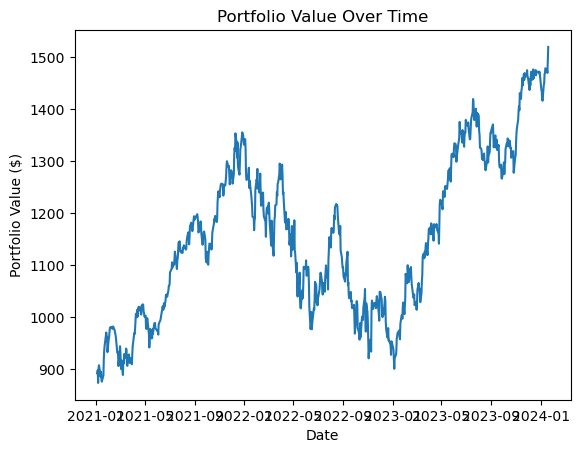

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AAPL", "MSFT", "GOOG"]
shares = [3, 2, 1]
date = '2021-01-01'

data = pd.DataFrame()
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    stock_data = stock.history(start=date)
    stock_data['portfolio_value'] = stock_data['Close'] * shares[i]
    data = pd.concat([data, stock_data['portfolio_value']], axis=1)

data['total_portfolio_value'] = data.sum(axis=1)

plt.plot(data.index, data['total_portfolio_value'])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.show()

In [7]:
data

,portfolio_value,portfolio_value,portfolio_value,total_portfolio_value
2021-01-04 00:00:00-05:00,381.492508,423.993195,86.412003,891.897705
2021-01-05 00:00:00-05:00,386.209167,424.402191,87.045998,897.657356
2021-01-06 00:00:00-05:00,373.208725,413.397736,86.764503,873.370964
2021-01-07 00:00:00-05:00,385.943848,425.161804,89.362503,900.468155
2021-01-08 00:00:00-05:00,389.275040,427.752258,90.360497,907.387794
...,...,...,...,...
2024-01-12 00:00:00-05:00,557.759995,776.940002,144.240005,1478.940002
2024-01-16 00:00:00-05:00,550.890015,780.539978,144.080002,1475.509995
2024-01-17 00:00:00-05:00,548.039978,778.940002,142.889999,1469.869980
2024-01-18 00:00:00-05:00,565.890015,787.739990,144.990005,1498.620010


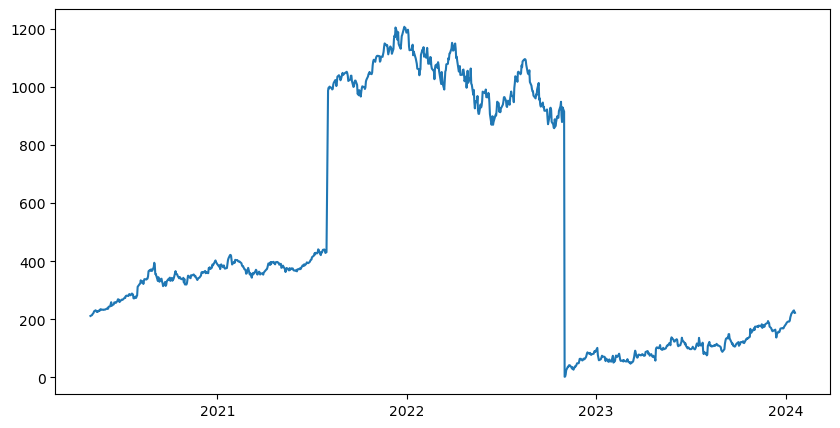

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

tickers = ["AAPL", "MSFT", "AAPL"]
shares = [3, 2, -6]
date_purchased = ['2020-05-01', '2021-08-01', '2022-11-01']
date_purchased = pd.to_datetime(date_purchased)

data = pd.DataFrame()
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    stock_data = stock.history(start = date_purchased[i])
    stock_data[tickers[i]] = stock_data['Close'] * shares[i]
    data = pd.concat([data, stock_data[tickers[i]]], axis=1)

data['total_portfolio_value'] = data.sum(axis=1)
fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')

# set the x-axis tick locator and formatter to show only the years
years = YearLocator()
year_format = DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_format)

plt.show()


In [19]:
data

,AAPL,MSFT,AAPL,total_portfolio_value
2020-05-01 00:00:00-04:00,211.717209,NaN,NaN,211.717209
2020-05-04 00:00:00-04:00,214.712769,NaN,NaN,214.712769
2020-05-05 00:00:00-04:00,217.935379,NaN,NaN,217.935379
2020-05-06 00:00:00-04:00,220.183868,NaN,NaN,220.183868
2020-05-07 00:00:00-04:00,222.461632,NaN,NaN,222.461632
...,...,...,...,...
2024-01-12 00:00:00-05:00,557.759995,776.940002,-1115.519989,219.180008
2024-01-16 00:00:00-05:00,550.890015,780.539978,-1101.780029,229.649963
2024-01-17 00:00:00-05:00,548.039978,778.940002,-1096.079956,230.900024
2024-01-18 00:00:00-05:00,565.890015,787.739990,-1131.780029,221.849976


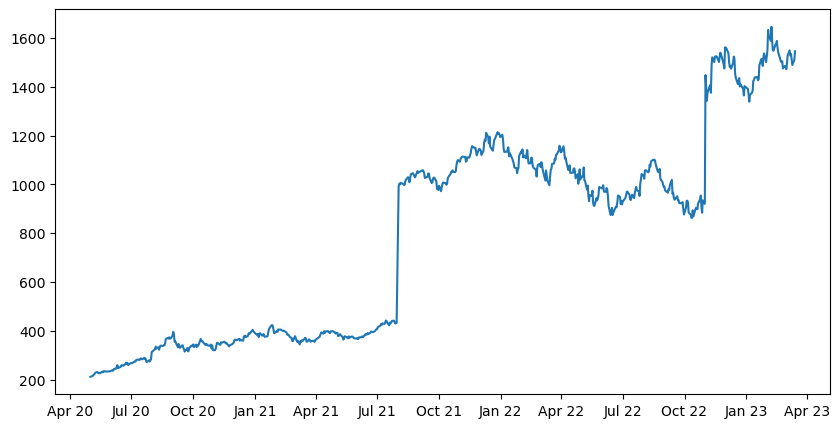

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

tickers = ["AAPL", "MSFT", "GOOG"]
shares = [3, 2, 6]
date_purchased = ['2020-05-01', '2021-08-01', '2022-11-01']
date_purchased = pd.to_datetime(date_purchased)

data = pd.DataFrame()
for i in range(len(tickers)):
    stock = yf.Ticker(tickers[i])
    stock_data = stock.history(start=date_purchased[i])
    stock_data['portfolio_value'] = stock_data['Close'] * shares[i]
    data = pd.concat([data, stock_data['portfolio_value']], axis=1)

data['total_portfolio_value'] = data.sum(axis=1)
fig, ax = plt.subplots(figsize=(10, 5)) # set the figsize parameter to increase the width of the plot
ax.plot(data.index, data['total_portfolio_value'], label='Total Portfolio Value')

# set the x-axis tick locator and formatter to show only January, April, July, and October of each year
months = MonthLocator(bymonth=[1, 4, 7, 10])
month_format = DateFormatter('%b %Y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)

# modify the month format to show abbreviated month names using three letters
month_format = DateFormatter('%b %y')
ax.xaxis.set_major_formatter(month_format)

plt.show()

In [3]:
import matplotlib
print(matplotlib.__version__)

3.6.2
